<a href="https://colab.research.google.com/github/Dhwaj-054/lit-college-codes/blob/main/DAV_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("DAV Lab 3")
print("Dhwaj Jain S012")

DAV Lab 3
Dhwaj Jain S012


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("Company.csv")

In [ ]:
df.head()


,Company,Establish_Year,Profit_Cr,Loss_Cr,Category
0,Reliance Industries,1966,66702,0,Energy & Conglomerate
1,Indian Oil Corporation,1959,9792,0,Oil & Gas
2,Life Insurance Corporation,1956,35997,0,Insurance
3,Oil and Natural Gas Corporation,1956,35440,0,Oil & Gas
4,Bharat Petroleum,1952,2131,0,Oil & Gas


In [ ]:
mean= df.mean(numeric_only=True)
median= df.median(numeric_only=True)
mode= df.mode(numeric_only=True).iloc[0]
std=df.std(numeric_only=True)

In [ ]:
print("Mean:\n",mean)
print("Median:\n",median)
print("Mode:\n",mode)
print("Standard Deviation:\n",std)

Mean:
 Establish_Year     1960.50
Profit_Cr         13639.44
Loss_Cr             323.30
dtype: float64
Median:
 Establish_Year    1971.0
Profit_Cr         9609.0
Loss_Cr              0.0
dtype: float64
Mode:
 Establish_Year     1945.0
Profit_Cr         28165.0
Loss_Cr               0.0
Name: 0, dtype: float64
Standard Deviation:
 Establish_Year       38.014095
Profit_Cr         15383.798146
Loss_Cr            2242.335574
dtype: float64


In [ ]:
if 'Company' in df.columns:
    le=LabelEncoder()
    df['Company_encoded']=le.fit_transform(df['Company'])
    print(df[['Company','Company_encoded']].head(10))
else:
    print("Company column not found in the DataFrame")

                           Company  Company_encoded
0              Reliance Industries               37
1           Indian Oil Corporation               21
2       Life Insurance Corporation               27
3  Oil and Natural Gas Corporation               33
4                 Bharat Petroleum                5
5              State Bank of India               38
6                      Tata Motors               41
7                       Tata Steel               43
8        Tata Consultancy Services               40
9              Hindalco Industries               14


In [ ]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

if 'Category' in df.columns:
  category_ohe = pd.get_dummies (df['Category'], prefix='Category')
  print(category_ohe.head(10))

   Category_Agriculture  Category_Airline  Category_Auto Components  Category_Automotive  Category_Banking  Category_Chemicals  Category_Construction & Engineering  Category_Consumer Goods  Category_Diversified  Category_Energy  Category_Energy & Conglomerate  Category_Financial Services  Category_Financials  Category_Food Processing  Category_IT Services  Category_Insurance  Category_Metals  Category_Metals & Mining  Category_Mining  Category_Oil & Gas  Category_Steel  Category_Telecommunications  Category_Utilities
0                 False             False                     False                False             False               False                                False                    False                 False            False                            True                        False                False                     False                 False               False            False                     False            False               False           False    

In [ ]:
statistics = df[['Establish_Year', 'Profit_Cr','Loss_Cr']].agg(['mean','median'])
mode_values = df[['Establish_Year', 'Profit_Cr', 'Loss_Cr']].mode().iloc[0] # mode may have multiple,

statistics.loc['mode'] = mode_values


result = statistics.transpose().reset_index()
result.columns = ['Column','Mean', 'Median','Mode']
print(result)

           Column      Mean  Median     Mode
0  Establish_Year   1960.50  1971.0   1945.0
1       Profit_Cr  13639.44  9609.0  28165.0
2         Loss_Cr    323.30     0.0      0.0


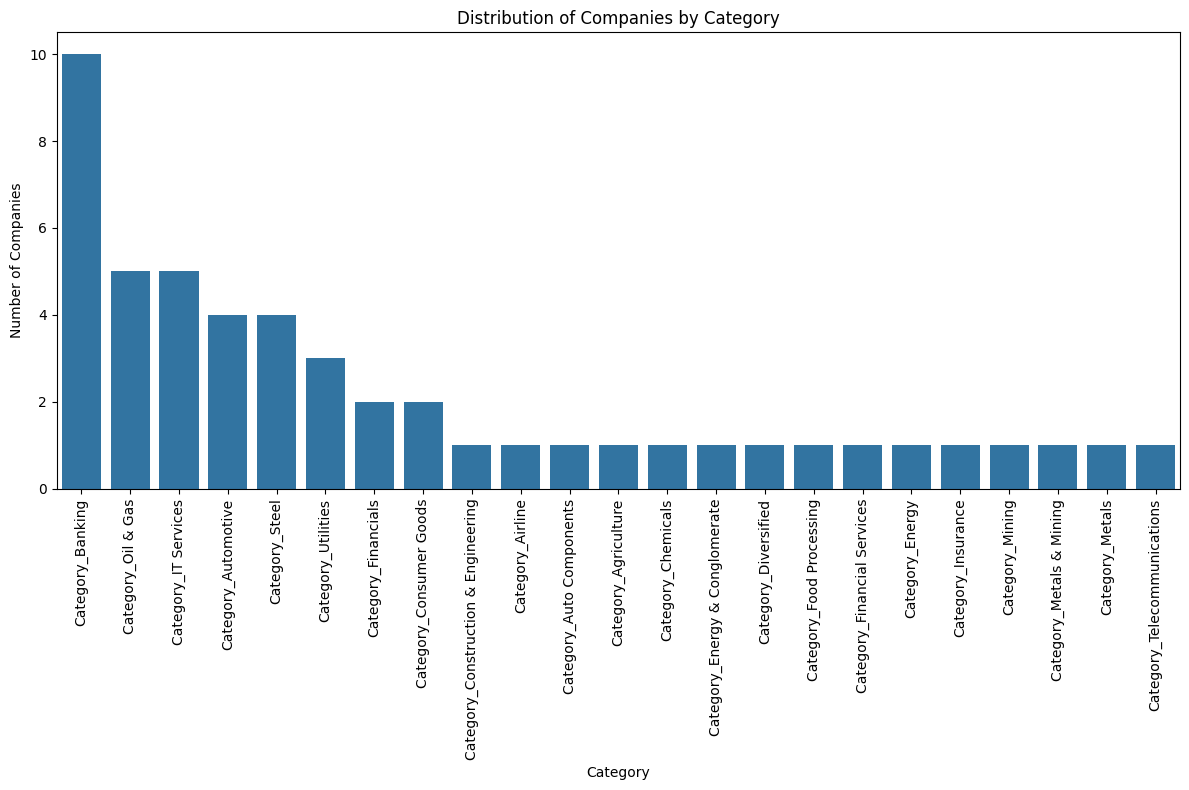

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


category_columns = [col for col in df_encoded.columns if col.startswith('Category_')]

category_counts = df_encoded[category_columns].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Companies')
plt.title('Distribution of Companies by Category')
plt.tight_layout()
plt.show()

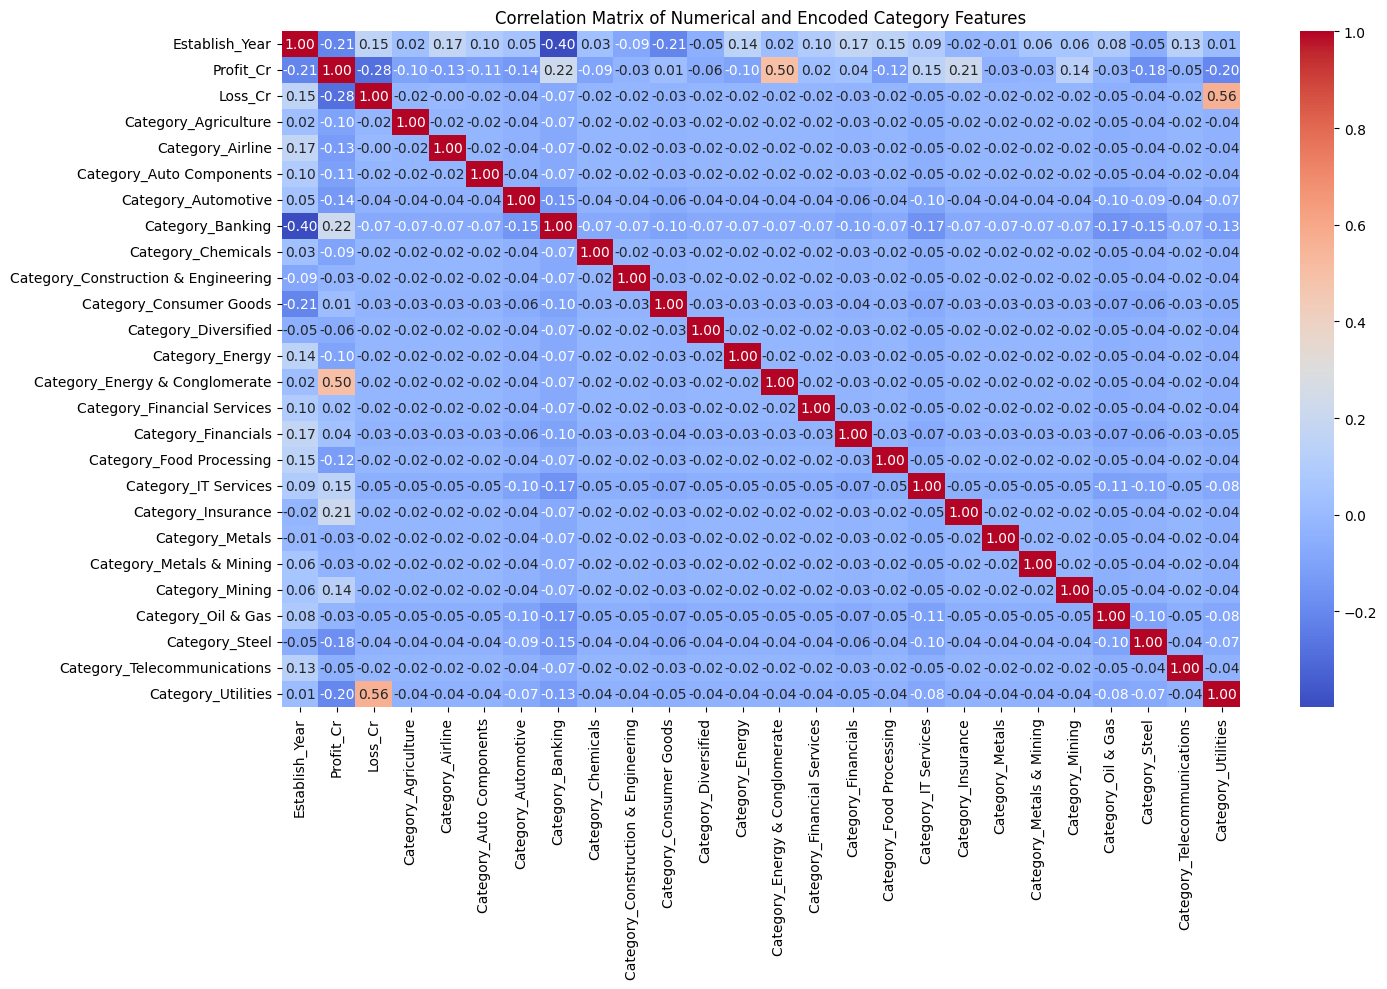

In [ ]:
# Select the numerical columns and the one-hot encoded category columns
correlation_data = df_encoded[['Establish_Year', 'Profit_Cr', 'Loss_Cr'] + category_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical and Encoded Category Features')
plt.tight_layout()
plt.show()